<a href="https://colab.research.google.com/github/Alixandrini/ENGJ33/blob/main/Aula%202/Realce_de_uma_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histograma de uma imagem em Python

O realce do histograma é uma técnica de transformação de intensidade que tem por objetivo balancear os níveis de cinza em uma imagem de forma automática, sem precisar de parâmetros e configurações adicionais. Dessa forma, imagens com um nível de brilho desbalanceados, ou seja, claras ou escuras demais atingem uma distribuição normalizada, o que garante um melhor contraste e visualização dos detalhes presentes na cena. <br>
Como sempre, vamos importar algumas bibliotecas básicas que serão necessárias para a implementação do código.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage import data
from PIL import Image
import math

A biblioteca skimage será utilizada para o carregamento das imagens a serem trabalhadas, como por exemplo, dessa xícara de café:

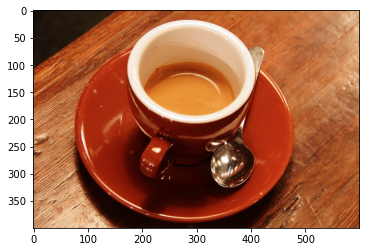

In [ ]:
image = data.coffee()
plt.imshow(image, cmap='gray')

Vamos criar um método para transformar essa imagem em escala de cinza, para fins de simplicidade, manipulando apenas uma matriz.

In [ ]:
def convert_to_gray(image, luma=False):
    if luma:
        params = [0.299, 0.589, 0.114]
    else:
        params = [0.2125, 0.7154, 0.0721]        
        gray_image = np.ceil(np.dot(image[...,:3], params))
 
    # Saturando os valores em 255
    gray_image[gray_image > 255] = 255
    
    return gray_image

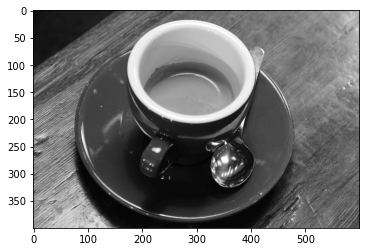

In [ ]:
plt.imshow(convert_to_gray(image), cmap='gray')
img=convert_to_gray(image)

O primeiro método serve para iniciar o histograma, que será um objeto com 256 valores, sendo cada um deles um dos níveis de intensidade que uma imagem pode assumir, pois o domínio de intensidade de um pixel varia entre 0 (para cor preta) até 255 (para cor branca).

In [ ]:
def instantiate_histogram():    
    hist_array= []
    
    for i in range(0,256):
        hist_array.append(str(i))
        hist_array.append(0)
    
    hist_dct = {hist_array[i]: hist_array[i + 1] for i in range(0, len(hist_array), 2)} 
    
    return hist_dct
histogram = instantiate_histogram()

Uma vez que o dicionário foi criado, basta apenas contar quantas vezes cada valor de intensidade aparece na imagem, percorrendo cada um dos pixels e contabilizando o número de aparições.

In [ ]:
print (histogram)

{'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '29': 0, '30': 0, '31': 0, '32': 0, '33': 0, '34': 0, '35': 0, '36': 0, '37': 0, '38': 0, '39': 0, '40': 0, '41': 0, '42': 0, '43': 0, '44': 0, '45': 0, '46': 0, '47': 0, '48': 0, '49': 0, '50': 0, '51': 0, '52': 0, '53': 0, '54': 0, '55': 0, '56': 0, '57': 0, '58': 0, '59': 0, '60': 0, '61': 0, '62': 0, '63': 0, '64': 0, '65': 0, '66': 0, '67': 0, '68': 0, '69': 0, '70': 0, '71': 0, '72': 0, '73': 0, '74': 0, '75': 0, '76': 0, '77': 0, '78': 0, '79': 0, '80': 0, '81': 0, '82': 0, '83': 0, '84': 0, '85': 0, '86': 0, '87': 0, '88': 0, '89': 0, '90': 0, '91': 0, '92': 0, '93': 0, '94': 0, '95': 0, '96': 0, '97': 0, '98': 0, '99': 0, '100': 0, '101': 0, '102': 0, '103': 0, '104': 0, '105': 0, '106': 0, '107': 0, '108': 0, '109': 0, '110': 0,

(array([3.000e+00, 4.000e+00, 1.100e+01, 8.600e+01, 2.070e+02, 6.370e+02,
        2.418e+03, 2.607e+03, 1.658e+03, 2.729e+03, 3.175e+03, 2.208e+03,
        1.168e+03, 1.298e+03, 2.086e+03, 1.548e+03, 1.095e+03, 9.800e+02,
        1.147e+03, 1.233e+03, 1.615e+03, 1.729e+03, 1.559e+03, 1.921e+03,
        1.884e+03, 1.631e+03, 1.277e+03, 1.116e+03, 9.300e+02, 7.820e+02,
        8.590e+02, 9.790e+02, 9.340e+02, 8.430e+02, 7.150e+02, 6.420e+02,
        5.590e+02, 5.070e+02, 5.720e+02, 6.200e+02, 6.660e+02, 6.730e+02,
        6.300e+02, 6.790e+02, 6.370e+02, 7.250e+02, 6.540e+02, 6.980e+02,
        7.180e+02, 7.360e+02, 7.640e+02, 7.450e+02, 7.430e+02, 7.700e+02,
        6.740e+02, 6.570e+02, 6.720e+02, 7.240e+02, 7.670e+02, 8.740e+02,
        9.070e+02, 9.450e+02, 1.119e+03, 1.415e+03, 1.824e+03, 2.096e+03,
        2.245e+03, 2.245e+03, 2.153e+03, 2.102e+03, 2.113e+03, 2.162e+03,
        2.190e+03, 2.013e+03, 1.927e+03, 1.767e+03, 1.659e+03, 1.617e+03,
        1.543e+03, 1.480e+03, 1.359e+0

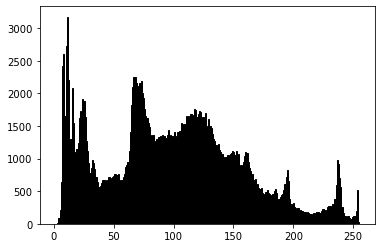

In [ ]:
plt.hist (img.ravel(), bins = 256, fc = 'k', ec = 'k') #calculando histograma

In [ ]:
img_d=img*0.5

(array([3.000e+00, 4.000e+00, 1.100e+01, 8.600e+01, 2.070e+02, 6.370e+02,
        2.418e+03, 2.607e+03, 1.658e+03, 2.729e+03, 3.175e+03, 2.208e+03,
        1.168e+03, 1.298e+03, 2.086e+03, 1.548e+03, 1.095e+03, 9.800e+02,
        1.147e+03, 1.233e+03, 1.615e+03, 1.729e+03, 1.559e+03, 1.921e+03,
        1.884e+03, 1.631e+03, 1.277e+03, 1.116e+03, 9.300e+02, 7.820e+02,
        8.590e+02, 9.790e+02, 9.340e+02, 8.430e+02, 7.150e+02, 6.420e+02,
        5.590e+02, 5.070e+02, 5.720e+02, 6.200e+02, 6.660e+02, 6.730e+02,
        6.300e+02, 6.790e+02, 6.370e+02, 7.250e+02, 6.540e+02, 6.980e+02,
        7.180e+02, 7.360e+02, 7.640e+02, 7.450e+02, 7.430e+02, 7.700e+02,
        6.740e+02, 6.570e+02, 6.720e+02, 7.240e+02, 7.670e+02, 8.740e+02,
        9.070e+02, 9.450e+02, 1.119e+03, 1.415e+03, 1.824e+03, 2.096e+03,
        2.245e+03, 2.245e+03, 2.153e+03, 2.102e+03, 2.113e+03, 2.162e+03,
        2.190e+03, 2.013e+03, 1.927e+03, 1.767e+03, 1.659e+03, 1.617e+03,
        1.543e+03, 1.480e+03, 1.359e+0

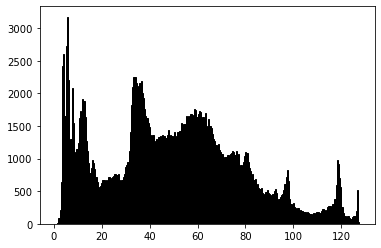

In [ ]:
plt.hist (img_d.ravel(), bins = 256, fc = 'k', ec = 'k') #calculando histograma

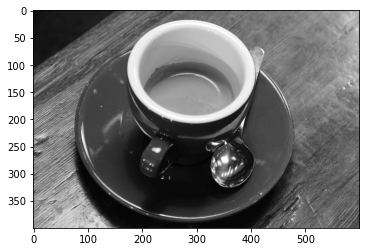

In [ ]:
plt.imshow(img_d, cmap='gray')

# Ajuste de brilho/contraste, limiarização, limiarização de Otsu, histograma.
Transformações de pixel <br>
Neste tipo de processamento de imagem, o valor de cada pixel de saída depende somente do valor do pixel de entrada correspondente (mais, potencialmente, alguma informação global ou parâmetros).<br>
Exemplos de tais operadores incluem ajuste de brilho e contraste e correção e transformações de cor.
## Ajuste de brilho e contraste
Duas transformações de pixel comuns são multiplicação e adição por constantes:<br>
g( i, j)=α⋅f ( i, j )+ β
Os parâmetros α>0 e β são chamados de gain e bias; esses parâmetros controlam contraste e brilho da imagem.
Para separação de modificações de brilho e contraste, pode-se adotar : <br>
g( i, j)=α⋅( f (i , j)−128 )+128+ β <br>
Para especificar brilho α e contraste β no intervalo de -1 a +1: <br>
x=f ( i, j )/255                                  <br>
y= {                                              <br>
( x + β−0.5 )⋅(1+ α )+0.5 , se -1≤β <0             <br>
( x + β−0.5 )⋅(1/(1−α ))+0 . 5 , se 0≤β <1          <br>
( x + β−0.5 )/ε +0.5 , se β=1                           <br>
f (i , j)=255⋅y                                        <br>

In [ ]:
from PIL import ImageEnhance
from PIL import Image

  
# Opens the image file
image = Image.open('Pictures/carros.png')  
  
# shows image in image viewer
image.show() 
# Enhance Brightness
curr_bri = ImageEnhance.Brightness(image)
new_bri = 2.5
  
# Brightness enhanced by a factor of 2.5
img_brightened = curr_bri.enhance(new_bri)
  
# shows updated image in image viewer
img_brightened.show()  

In [ ]:
# shows image in image viewer
image.show()
  
  
# Enhance Color Level
curr_col = ImageEnhance.Color(image)
new_col = 2.5
  
# Color level enhanced by a factor of 2.5
img_colored = curr_col.enhance(new_col)
  
# shows updated image in image viewer
img_colored.show()

In [ ]:
# shows image in image viewer
image.show()
  
  
# Enhance Contrast
curr_con = ImageEnhance.Contrast(image)
new_con = 0.3
  
# Contrast enhanced by a factor of 0.3
img_contrasted = curr_con.enhance(new_con)
  
# shows updated image in image viewer
img_contrasted.show()  

In [ ]:
 
# shows image in image viewer
image.show()
  
# Enhance Sharpness
curr_sharp = ImageEnhance.Contrast(image)
new_sharp = 8.3
  
# Sharpness enhanced by a factor of 8.3
img_sharped = curr_sharp.enhance(new_sharp)
  
# shows updated image in image viewer
img_sharped.show()

## Limiarização

In [ ]:
from PIL import Image
from PIL import ImageFilter
import math
from random import randrange

# Obtendo Imagem Original
imagem_original = Image.open("Pictures/carros.png")
# Convertendo Imagem Original para o modo RGB
imagem = imagem_original.convert('RGB')
imagem.show()
#print(imagem.format, imagem.size, imagem.mode)

# Obtendo tamanho das componentes x, y
# Image.width e Image.height
largura, altura = imagem.size

In [ ]:
def binarizacao(limiar):
    print("Processando binarização...")
    # Convertendo em escala de cinza
    #cinza()
    # Percorrendo Matriz de Pixels
    for x in range(largura):
        for y in range(altura):
            # Obtendo componentes RGB pixel atual
            R, G, B = imagem.getpixel((x, y))
            # Modificando componentes RGB do pixel atual
            if ((R + G + B) / 3 <= limiar):
                imagem.putpixel((x, y), (0, 0, 0))
            else:
                imagem.putpixel((x, y), (255, 255, 255))
    # Exibindo imagem modificada
    imagem.show()

In [ ]:
binarizacao(100)

Processando binarização...


## Texto em uma imagem

In [ ]:
from PIL import Image, ImageDraw, ImageFont

# create an image
out = Image.new("RGB", (150, 100), (255, 255, 255))


# get a drawing context
d = ImageDraw.Draw(out)

# draw multiline text
d.multiline_text((10, 10), "Hello\nWorld", fill=(0, 0, 0))

out.show()